# Prediction using Supervised ML

Step-1: Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
url="https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"

Step-2: Importing Dataset

In [3]:
data=pd.read_csv(url)  #used to read csv files

In [4]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Step-3: Analysing the Data

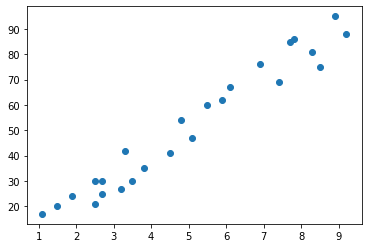

In [5]:
plt.scatter(data["Hours"],data["Scores"])  #used to plot (x,y) values in scattered manner. 

In [6]:
data.shape  #used to check the shape of an array-(number of rows,number of columns)

(25, 2)

In [7]:
data.isnull().any()  #used to Check whether there is any null values

Hours     False
Scores    False
dtype: bool

In [8]:
data.info()   #used To know the concise summary of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [9]:
data.describe()   #used to generate descriptive statistics

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Step-4: Seperating Independent varibales and Dependent variables in the Dataset

In [10]:
x=data.loc[:,["Hours"]].values  #storing the independent values in one variable
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [11]:
y=data.loc[:,["Scores"]].values  #storing the target values in one variable
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

Step-5: Splitting Train and Test data

In [12]:
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [14]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
print(x_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [16]:
prediction=model.predict(x_test)
prediction

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

In [17]:
data["Predicted Values"]=model.predict(data[["Hours"]])
data

,Hours,Scores,Predicted Values
0,2.5,21,26.794801
1,5.1,47,52.562508
2,3.2,27,33.732261
3,8.5,75,86.258740
4,3.5,30,36.705458
5,1.5,20,16.884145
6,9.2,88,93.196200
7,5.5,60,56.526771
8,8.3,81,84.276609
9,2.7,25,28.776933


In [18]:
print("Student score after studying for 9.25 hours is {}".format(model.predict([[9.25]])))

Student score after studying for 9.25 hours is [[93.69173249]]


In [19]:
from sklearn.metrics import r2_score

In [20]:
print("Accuracy of model = {}".format(r2_score(y_test,prediction)))

Accuracy of model = 0.9454906892105355
